# PCA of audio features

Here we reduce dimensionality of audio features data in order to try to gather insights about playlists. We sample some playlists and reduce the dimensionality of the features of their songs.

In [1]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

sns.set()

We sample 5 playlists and gather their songs.

In [2]:
playlists = pd.read_pickle('../data/sp_playlists.pkl')
playlist_ids = playlists.sample(2).id.to_list()
tracks = []
for file in glob.glob('../data/sp_tracks_ready_*.pkl'):
    df = pd.read_pickle(file)
    tracks.append(df[df.playlist_id.apply(lambda x: x in playlist_ids)][['playlist_id', 'id']])  
tracks = pd.concat(tracks, ignore_index=True)
tracks.dropna(inplace=True)

Now we read the features of the songs in order to extract those from the songs we want. We merge the datasets.

In [3]:
audio_features = pd.read_pickle('../data/sp_audio_features.pkl')
dataset = tracks.merge(audio_features, on='id').drop(columns=['id', 'mode', 'time_signature'])

We normalize data (between 0 and 1) and apply PCA transformation.

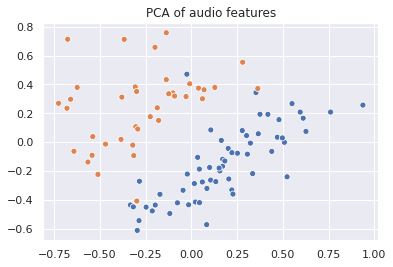

In [4]:
for column in dataset.drop(columns='playlist_id').columns:
    series = dataset[column]
    a = series.min()
    b = series.max()
    dataset.loc[:, column] = dataset[column].apply(lambda x: (x-a)/(b-a))

pca = PCA(n_components=2).fit_transform(dataset.drop(columns='playlist_id'))

sns.scatterplot(pca[:, 0], pca[:, 1], hue=dataset.playlist_id, legend=None)
plt.title('PCA of audio features')
plt.show()

In this case, we see some good news.